In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

In [38]:
df = pd.read_csv('titanic.csv')

In [39]:
df.shape

(887, 8)

In [40]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250


In [41]:
print(df.shape)

(887, 8)


In [42]:
print(df.columns.to_list())

['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']


In [43]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [44]:
df['Pclass'].nunique()

3

In [45]:
missing_age = df['Age'].isna().sum()
missing_age

np.int64(0)

In [46]:
print(df.isna().sum())

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


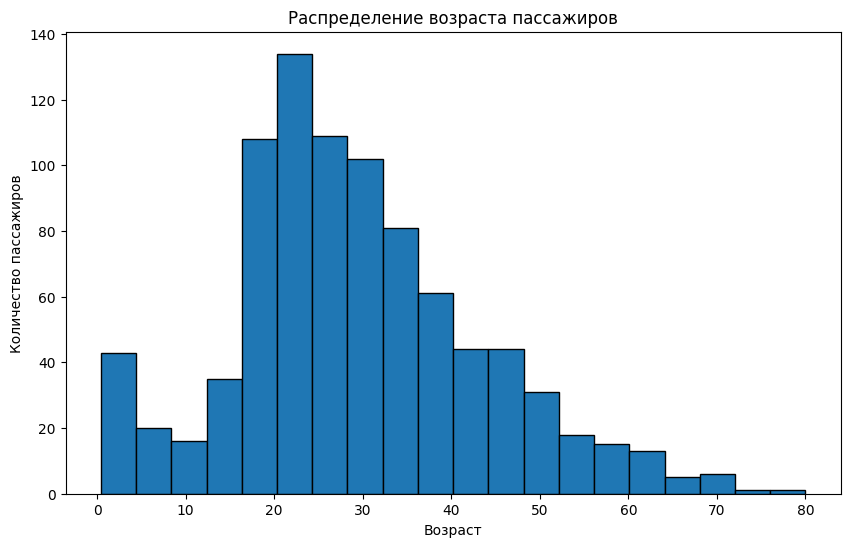

In [47]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins = 20, edgecolor = 'black')
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

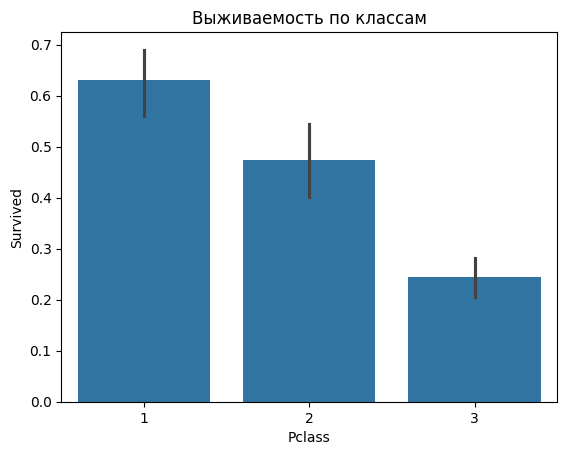

In [48]:
sns.barplot(x='Pclass', y = 'Survived', data = df)
plt.title('Выживаемость по классам')
plt.show()

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# подготовка данных
X = df[['Pclass','Age','Fare','Sex']] # фичи
y = df['Survived'] # целевая переменная

X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

C:\Temp\ipykernel_9824\3725301363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
score = model.score(X_test, y_test)
print(f"Точность модели R2: {score:.2f}")

Точность модели R2: 0.29


In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [55]:
y_pred = model.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")

Точность: 0.76


In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


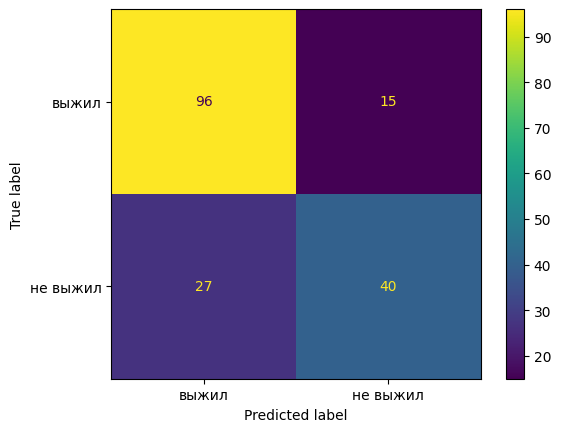

In [59]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['выжил','не выжил'])
disp.plot()
plt.show()

In [60]:
df['FamilySize'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']

In [61]:
X = df[['Pclass', 'Age', 'Fare', 'Sex', 'FamilySize']]

In [62]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [63]:
y_pred = model.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")

Точность: 0.76
